### <center>Análise de Clustering dos Super-Heróis</center>

-----------------------------------------------------------------------------
Este notebook tem como objetivo agrupar os super-heróis com base em suas características e poderes usando técnicas de clustering.
Os clusters nos ajudam a identificar grupos de heróis semelhantes, o que pode ser útil para análise, organização ou mesmo para criar 
insights sobre os dados.

##### Etapas do notebook:
1. **Carregamento dos Dados**: Carregamos o dataset processado e verificamos suas características principais.
2. **Preparação dos Dados**: Selecionamos as colunas relevantes para clustering e padronizamos os dados.
3. **Determinação do Número Ideal de Clusters**: Usamos os métodos *Elbow* e *Silhouette* para definir o número ideal de clusters.
4. **Aplicação do Algoritmo KMeans**: Agrupamos os dados com o número de clusters escolhido.
5. **Visualização dos Clusters**: Reduzimos as dimensões com PCA para visualização em 2D e analisamos os resultados.
6. **Salvamento dos Resultados**: Salvamos os dados com os rótulos de cluster para uso futuro.



##### **Importação das bibliotecas necessárias**


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configurações do notebook
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

##### **Clustering**

Primeiras linhas do dataset:


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0



Colunas relacionadas aos poderes (169 colunas):


['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

e:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

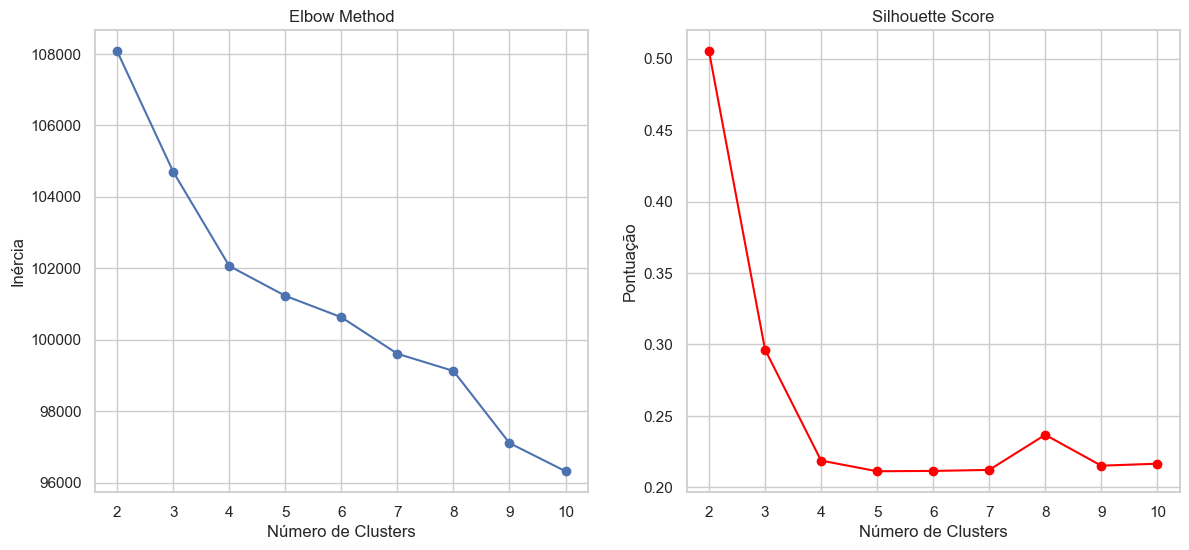


Número de super-heróis por cluster:


e:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster
3    502
0     86
2     66
1      6
Name: count, dtype: int64

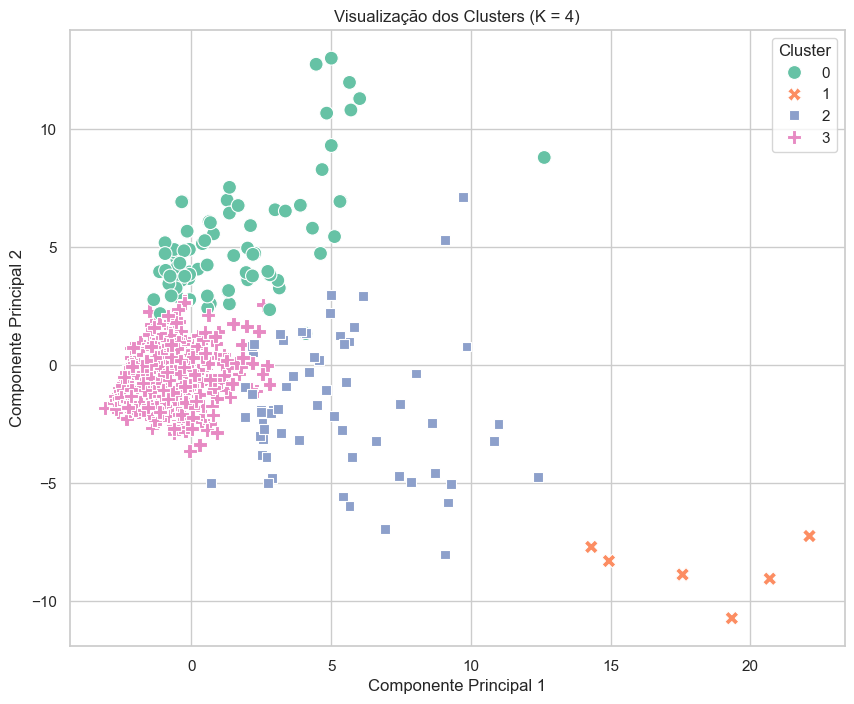


Dados clusterizados salvos em '../data/processed/clustered_data.csv'.

Modelo KMeans e scaler salvos na pasta '../streamlit/models/'.


In [2]:
# 1. Carregamento dos dados
data = pd.read_csv('../data/processed/merged_data_cleaned.csv')

# Exibir as primeiras linhas do dataset para inspeção inicial
print("Primeiras linhas do dataset:")
display(data.head())

# 2. Seleção de variáveis relacionadas aos poderes
power_columns = [col for col in data.columns if data[col].dtype in [np.int64, np.float64, bool]]

print(f"\nColunas relacionadas aos poderes ({len(power_columns)} colunas):")
display(power_columns)

powers_data = data[power_columns]

# Padronizar os dados
scaler = StandardScaler()
scaled_powers = scaler.fit_transform(powers_data)

# 3. Determinação do número ideal de clusters
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_powers)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_powers, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score")
plt.xlabel("Número de Clusters")
plt.ylabel("Pontuação")

plt.show()

# Escolher o número de clusters ideal com base nos gráficos
optimal_clusters = 4

# 4. Aplicar KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_powers)

# 5. Análise dos clusters
print("\nNúmero de super-heróis por cluster:")
display(data['Cluster'].value_counts())

# Visualizar os clusters
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_powers)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=data['Cluster'],
    palette='Set2',
    style=data['Cluster'],
    s=100
)
plt.title(f"Visualização dos Clusters (K = {optimal_clusters})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

# 6. Salvar os resultados no arquivo CSV
data.to_csv('../data/processed/clustered_data.csv', index=False)
print("\nDados clusterizados salvos em '../data/processed/clustered_data.csv'.")

# 7. Salvar o modelo e o scaler
joblib.dump(kmeans, '../streamlit/models/clustering_model.pkl')
joblib.dump(scaler, '../streamlit/models/clustering_scaler.pkl')
print("\nModelo KMeans e scaler salvos na pasta '../streamlit/models/'.")

Interpretação:
Cada grupo representa heróis com características e poderes similares.
A análise detalhada do resumo dos clusters pode revelar diferenças como a prevalência de poderes específicos ou atributos físicos.